In [1]:
import numpy as np

import kombine

Import some cool visualization stuff.

In [2]:
from matplotlib import pyplot as plt
import triangle
import prism

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

prism.inline_ipynb()

# 2-D Rosenbrock Target Distribution

Define the target function.

In [3]:
ndim = 2

def rosenbrock(x):
    return -np.sum((1.0 - x[:-1])*(1.0 - x[:-1]) + 100.0*(x[1:] - x[:-1]*x[:-1])*(x[1:] - x[:-1]*x[:-1]))

Create a uniformly distributed ensemble and burn it in.

In [4]:
nwalkers = 500                    
sampler = kombine.Sampler(nwalkers, ndim, rosenbrock)

p0 = np.random.uniform(-10, 10, size=(nwalkers, ndim))
p, post, q = sampler.burnin(p0)

See what burnin did.

In [5]:
prism.corner(sampler.chain)

Generate some more samples.

In [6]:
p, post, q = sampler.run_mcmc(500)

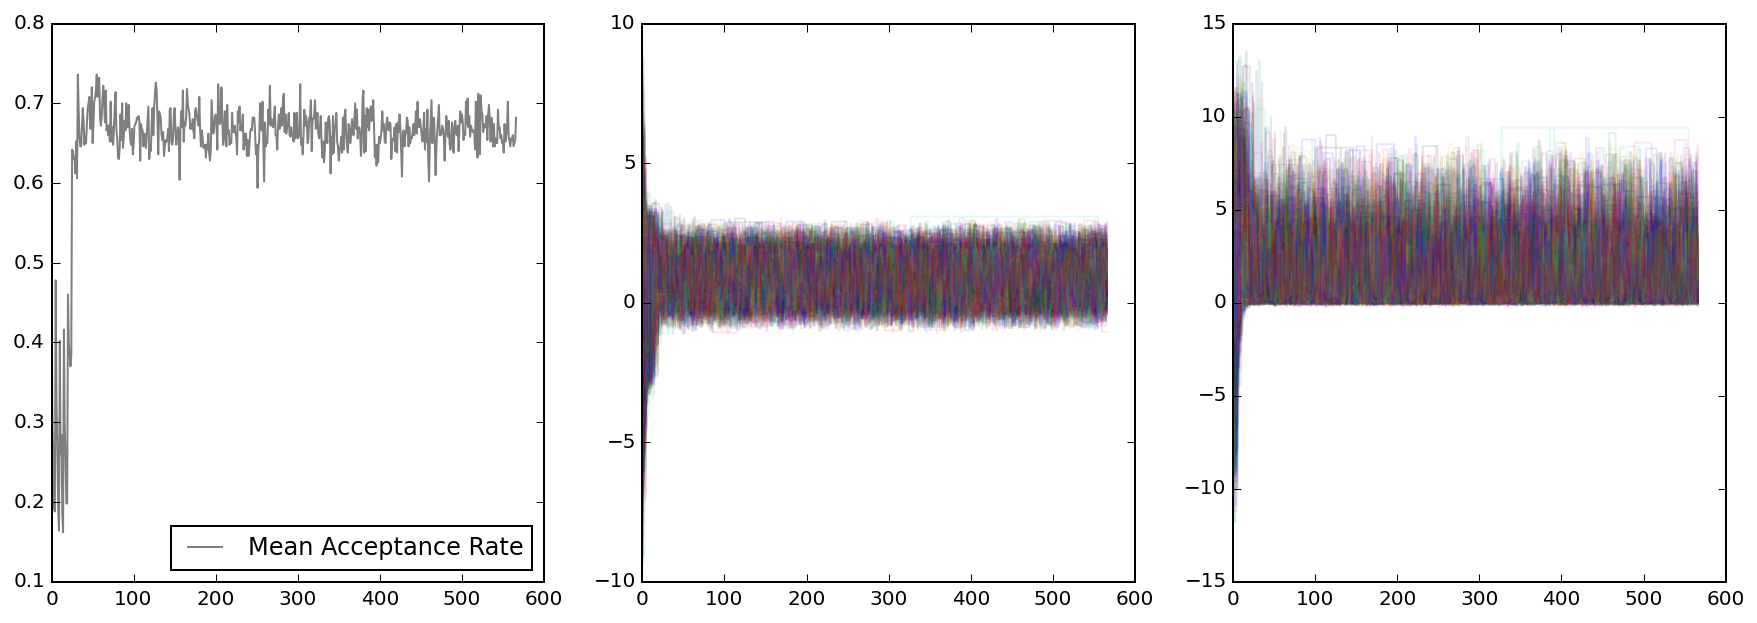

In [7]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(15, 5))

ax1.plot(sampler.acceptance_fraction, 'k', alpha=.5, label="Mean Acceptance Rate");

for p, ax in zip(range(sampler.dim), [ax2, ax3]):
    ax.plot(sampler.chain[..., p], alpha=0.1)

ax1.legend(loc='lower right');

Plot independent samples.

105262 independent samples collected with a mean ACL of 2.478.


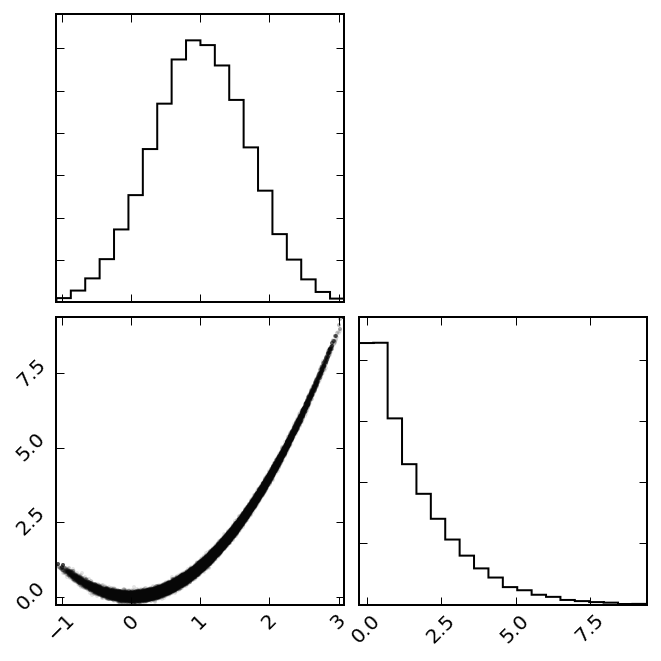

In [8]:
acls = np.ceil(2/np.mean(sampler.acceptance[-500:], axis=0) - 1).astype(int)

ind_samps = np.concatenate([sampler.chain[-500::acl, c].reshape(-1, 2) for c, acl in enumerate(acls)])
print "{} independent samples collected with a mean ACL of {}.".format(len(ind_samps), np.mean(acls))

triangle.corner(ind_samps, plot_density=False, plot_contours=False);